In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('./data/' + 'users.csv')
books = pd.read_csv('./data/' + 'books.csv')
train = pd.read_csv('./data/' + 'train_ratings.csv')
test = pd.read_csv('./data/' + 'test_ratings.csv')
sub = pd.read_csv('./data/' + 'sample_submission.csv')

In [3]:
def age_map(x: int) -> int:
    x = int(x)
    if 0 < x < 20:
        return 1
    elif x >= 20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4
    elif x >= 50 and x < 60:
        return 5
    elif x >= 60 and x < 70:
        return 6
    elif x >= 70 and x < 80:
        return 7
    else:
        return 0

In [4]:
zero_users = users.copy()

In [5]:
zero_users['age'] = users['age'].fillna(int('0'))

In [60]:
users['age'] = users['age'].fillna(int(users['age'].mean()))

In [6]:
zero_users['age'] = zero_users['age'].apply(age_map)

In [61]:
users['age'] = users['age'].apply(age_map)

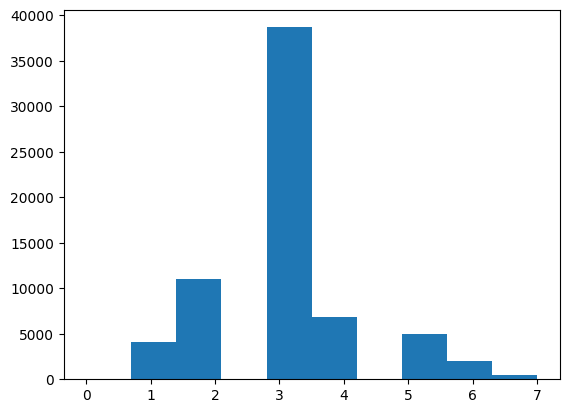

In [62]:
plt.hist(users['age'])
plt.show()

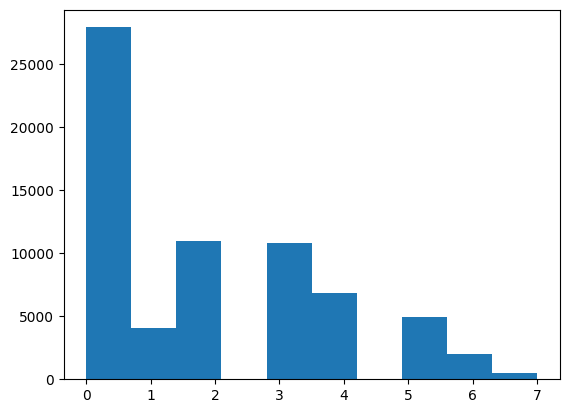

In [7]:
plt.hist(zero_users['age'])
plt.show()

In [8]:
zero_users

,user_id,location,age
0,8,"timmins, ontario, canada",0
1,11400,"ottawa, ontario, canada",4
2,11676,"n/a, n/a, n/a",0
3,67544,"toronto, ontario, canada",3
4,85526,"victoria, british columbia, canada",3
...,...,...,...
68087,278376,"danville, pennsylvania, usa",5
68088,278621,"victoria, delaware, canada",7
68089,278636,"irvington, alabama, usa",0
68090,278659,"vancouver, washington, usa",3
